<a href="https://colab.research.google.com/github/gagan-iitb/CS550/blob/main/Handouts/KNN_Smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import matplotlib.pyplot as plt
k=5

Randomly generating 40 points as input

In [2]:
lstx=[]
for j in range(40):
  lstx.append(random.randint(0,100))
dic={}
lsty=[]
for j in lstx:
  lsty.append(random.randint(0,50))

for j in range(len(lstx)):
  dic[lstx[j]]=lsty[j]


Plot of the input points

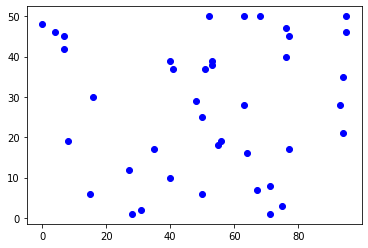

In [3]:

plt.scatter(lstx, lsty, c ="blue")
plt.show()


Function for calculating the k nearest neighbours

In [4]:
def fun(x,k):
  lst1=[]
  for j in lstx:
    lst1.append((abs(j-x),j))
  lst1.sort(key=lambda x:x[0])
  lst2=[]
  for j in range(k):
    lst2.append(lst1[j][1])
  return lst2


Smoothening function

In [5]:
def smooth(k_near,x):
  s=0
  for j in k_near:
    d=abs(j-x)
    a=(2.7)**(-d)
    b=dic[j]
    s+=(a*b)
  nr=s
  s=0
  for j in k_near:
    d=abs(j-x)
    a=(2.7)**(-d)
    s+=a
  dr=s
  return (nr/dr)

In [11]:
def smooth2(k_near, x):
  nr=0
  dr=0
  for j in k_near:
    d=abs(j-x)
    if (d>1):
      a=0.01
    else:
      a=1-d**3 
    b=dic[j]
    nr+=(a*b)
    dr+=a
  return(nr/dr)


Predicting the whole graph

In [15]:

j=0
while j<=max(lstx):
  x=j
  k_near=fun(x,k)
  y=smooth(k_near,x)
  dic[x]=y
  j+=0.01


In [16]:
lstx1=[]
lsty1=[]
for j in dic.keys():
  lstx1.append(j)
  lsty1.append(dic[j])
lst=[]
for j in range(len(lstx1)):
  lst.append((lstx1[j],lsty1[j]))
lst.sort(key=lambda x:x[0])
lstx1=[]
lsty1=[]
for j in lst:
  lstx1.append(j[0])
  lsty1.append(j[1])


Result

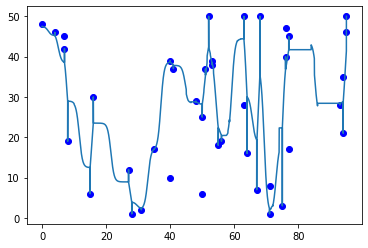

In [17]:

plt.scatter(lstx, lsty, c ="blue")
plt.plot(lstx1,lsty1)
plt.show()